<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquiring-the-Data" data-toc-modified-id="Acquiring-the-Data-1">Acquiring the Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2">Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Prepare-users_genre_df-from-movies.csv:" data-toc-modified-id="Prepare-users_genre_df-from-movies.csv:-2.1">Prepare <code>users_genre_df</code> from <code>movies.csv</code>:</a></span></li><li><span><a href="#Precess-ratings.csv:" data-toc-modified-id="Precess-ratings.csv:-2.2">Precess <code>ratings.csv</code>:</a></span></li><li><span><a href="#Select-an-Active-User:-prepare-input_movies" data-toc-modified-id="Select-an-Active-User:-prepare-input_movies-2.3">Select an Active User: prepare <code>input_movies</code></a></span></li></ul></li><li><span><a href="#Content-Based-Recommendation-System" data-toc-modified-id="Content-Based-Recommendation-System-3">Content-Based Recommendation System</a></span><ul class="toc-item"><li><span><a href="#Method---1:" data-toc-modified-id="Method---1:-3.1">Method - 1:</a></span><ul class="toc-item"><li><span><a href="#Mathematical-Derivation" data-toc-modified-id="Mathematical-Derivation-3.1.1">Mathematical Derivation</a></span><ul class="toc-item"><li><span><a href="#The-process-for-creating-a-Content-Based-recommendation-system-is-as-follows:" data-toc-modified-id="The-process-for-creating-a-Content-Based-recommendation-system-is-as-follows:-3.1.1.1">The process for creating a Content-Based recommendation system is as follows:</a></span></li></ul></li><li><span><a href="#Create-input_genre_df-of-the-Active-User" data-toc-modified-id="Create-input_genre_df-of-the-Active-User-3.1.2">Create <code>input_genre_df</code> of the Active User</a></span></li><li><span><a href="#Compute-UserProfile-($\overrightarrow{\theta}$):" data-toc-modified-id="Compute-UserProfile-($\overrightarrow{\theta}$):-3.1.3">Compute <code>UserProfile</code> ($\overrightarrow{\theta}$):</a></span></li><li><span><a href="#Recommend-new-movie-to-the-user-based-on-his-UserProfile" data-toc-modified-id="Recommend-new-movie-to-the-user-based-on-his-UserProfile-3.1.4">Recommend new movie to the user based on his <code>UserProfile</code></a></span></li></ul></li><li><span><a href="#Method-2" data-toc-modified-id="Method-2-3.2">Method-2</a></span><ul class="toc-item"><li><span><a href="#Mathematical-Derivation:" data-toc-modified-id="Mathematical-Derivation:-3.2.1">Mathematical Derivation:</a></span></li></ul></li><li><span><a href="#Advantages-and-Disadvantages-of-Content-Based-Filtering" data-toc-modified-id="Advantages-and-Disadvantages-of-Content-Based-Filtering-3.3">Advantages and Disadvantages of Content-Based Filtering</a></span></li></ul></li><li><span><a href="#Collaborative-Filtering" data-toc-modified-id="Collaborative-Filtering-4">Collaborative Filtering</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Select-a-user-with-movies-the-user-has-watched" data-toc-modified-id="Select-a-user-with-movies-the-user-has-watched-4.0.1">Select a user with movies the user has watched</a></span></li><li><span><a href="#Filter-the-users-who-has-seen-the-same-movies" data-toc-modified-id="Filter-the-users-who-has-seen-the-same-movies-4.0.2">Filter the users who has seen the same movies</a></span></li><li><span><a href="#Similarity-of-the-input-user-to-his-neighbors" data-toc-modified-id="Similarity-of-the-input-user-to-his-neighbors-4.0.3">Similarity of the input user to his neighbors</a></span></li><li><span><a href="#The-top-k-similar-users-to-the-Active-User" data-toc-modified-id="The-top-k-similar-users-to-the-Active-User-4.0.4">The top k similar users to the Active User</a></span></li><li><span><a href="#Rating-of-all-movies-by-selected-users" data-toc-modified-id="Rating-of-all-movies-by-selected-users-4.0.5">Rating of all movies by selected users</a></span></li></ul></li><li><span><a href="#Advantages-and-Disadvantages-of-Collaborative-Filtering" data-toc-modified-id="Advantages-and-Disadvantages-of-Collaborative-Filtering-4.1">Advantages and Disadvantages of Collaborative Filtering</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
import os

In [2]:
# DS_UTILS_PATH = os.environ.get('DS_UTILS')

In [3]:
# %run {DS_UTILS_PATH}

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
%matplotlib inline

- [Stanford: Overview of Recommender Systems](https://www.youtube.com/watch?v=1JRrCEgiyHM)
- [Stanford: Content Based Recommendations](https://www.youtube.com/watch?v=2uxXPzm-7FY)
- [Stanford:  Collaborative Filtering](https://www.youtube.com/watch?v=h9gpufJFF-0)

<h1> Recommendation System</h1>

Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore Content-based recommendation systems and implement a simple version of one using Python and the Pandas library.

## Acquiring the Data

Dataset acquired from [GroupLens](http://grouplens.org/datasets/movielens/). Lets download the dataset. To download the data, we will use **`!wget`**. Simply run the following Bash scripts:  

In [5]:
# !wget -P $HOME/Data/ moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip

In [6]:
# !unzip -o -j $HOME/Data/moviedataset.zip -d $HOME/Data

Now we're ready to start working with the data!

## Preprocessing

In [7]:
DATA = os.environ['DATA']

In [8]:
!echo {DATA}; ls {DATA}

/Users/am/DATA
README.txt             ratings.csv            users_interactions.csv
links.csv              shared_articles.csv
movies.csv             tags.csv


In [9]:
movies_df = pd.read_csv(DATA+'/movies.csv')
ratings_df = pd.read_csv(DATA+'/ratings.csv')

In [10]:
movies_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [11]:
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435


### Prepare `users_genre_df` from `movies.csv`:

In [12]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [14]:
movies_df.shape

(34208, 3)

Let's also remove the year from the __title__ column by using pandas' replace function and store in a new __year__ column.

In [15]:
# Using regular expressions to find a year stored between parentheses
# We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))', expand=False); movies_df.year

0        (1995)
1        (1995)
2        (1995)
3        (1995)
4        (1995)
          ...  
34203    (1967)
34204    (2010)
34205    (2009)
34206    (2015)
34207    (1975)
Name: year, Length: 34208, dtype: object

In [16]:
# Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)', expand=False); movies_df.year

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
34203    1967
34204    2010
34205    2009
34206    2015
34207    1975
Name: year, Length: 34208, dtype: object

In [17]:
# Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '', regex=True)

In [18]:
# # Applying the strip function to get rid of any ending whitespace characters that may have appeared
# movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

In [19]:
# Applying the strip function to get rid of any ending whitespace characters that may have appeared
# movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df['title'] = movies_df['title'].str.strip()
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


With that, let's also split the values in the __Genres__ column into a __list of Genres__ to simplify future use. This can be achieved by applying Python's split string function on the correct column.

In [20]:
#Every genre is separated by a | so we simply have to call the split function on |
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


Since keeping genres in a list format isn't optimal for the content-based recommendation system technique, we will use the One Hot Encoding technique to convert the list of genres to a vector where each column corresponds to one possible value of the feature. This encoding is needed for feeding categorical data. In this case, we store every different genre in columns that contain either 1 or 0. 1 shows that a movie has that genre and 0 shows that it doesn't. Let's also store this dataframe in another variable since genres won't be important for our first recommendation system.

In [21]:
# movies_df2 = movies_df[0:10]
# moviesWithGenres_df = movies_df[0:10]; moviesWithGenres_df

In [22]:
# Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
users_genre_df = movies_df.copy()

In [23]:
# For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        users_genre_df.at[index, genre] = 1

In [24]:
users_genre_df.head(3)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
users_genre_df = users_genre_df.fillna(0)
users_genre_df.head(3)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
users_genre_df.columns[4:]

Index(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
       'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir',
       '(no genres listed)'],
      dtype='object')

### Precess `ratings.csv`:

Next, let's look at the ratings dataframe.

In [27]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [28]:
ratings_df.dtypes, ratings_df.shape

(userId         int64
 movieId        int64
 rating       float64
 timestamp      int64
 dtype: object,
 (22884377, 4))

Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it. We won't be needing the timestamp column, so let's drop it to save on memory.

In [29]:
# Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', axis=1)

In [30]:
ratings_df.head(3)

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0


### Select an Active User: prepare `input_movies`

In [31]:
active_user = [
    {'title':'Breakfast Club, The', 'rating':5},
    {'title':'Toy Story', 'rating':3.5},
    {'title':'Jumanji', 'rating':2},
    {'title':'Pulp Fiction', 'rating':5},
    {'title':'Akira', 'rating':4.5}
]

active_user_movies = pd.DataFrame(active_user)
active_user_movies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [32]:
input_movies = pd.merge(movies_df, active_user_movies, on='title'); 

# Dropping information we won't use from the input dataframe
input_movies = input_movies.drop('genres', axis=1).drop('year', axis=1)

In [33]:
input_movies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


## Content-Based Recommendation System

### Method - 1:

#### Mathematical Derivation

- Given:
    - a selected user (`input_movies`) with ratings givenby him to some selected movies
        - x = `input_movies['rating'].values`:
        - A = `input_genre_matrix.values`
    - A genres matrix (`users_genre_matrix`)
        - G = `users_genre_matrix.values`
- Goal:

##### The process for creating a Content-Based recommendation system is as follows:

- Compute `UserProfile`($\overrightarrow{\theta}$):
    - $\overrightarrow{\theta} = A^{T} \cdot \overrightarrow{x}$
- Compute the Recommendation Vector:
    - $ \overrightarrow{y}= G^{T} \cdot \overrightarrow{\theta}$

Now, let's take a look at how to implement __Content-Based__ or __Item-Item recommendation systems__. This technique attempts **to figure out what a user's favourite aspects of an item is, and then recommends items that present those aspects.**

- figure out the input's (active_user) favorite genres from the movies and ratings given.

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the __userInput__. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .

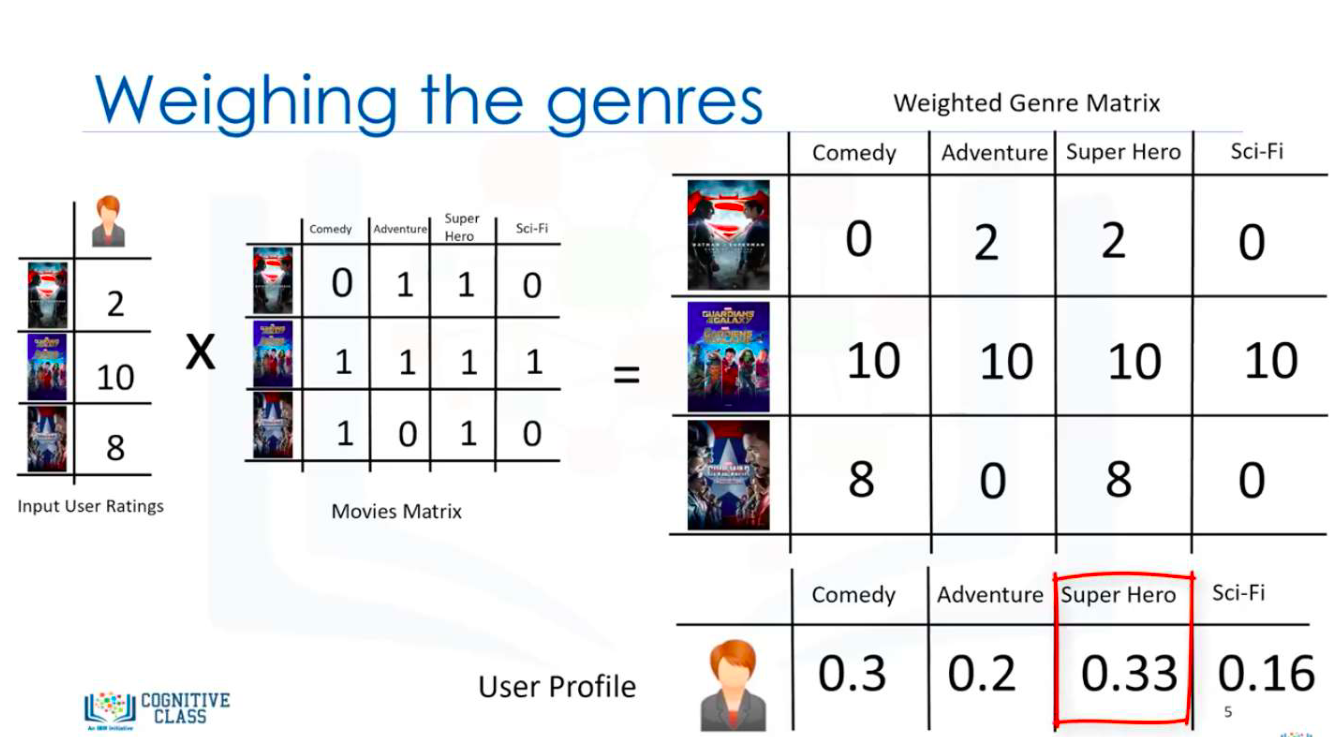

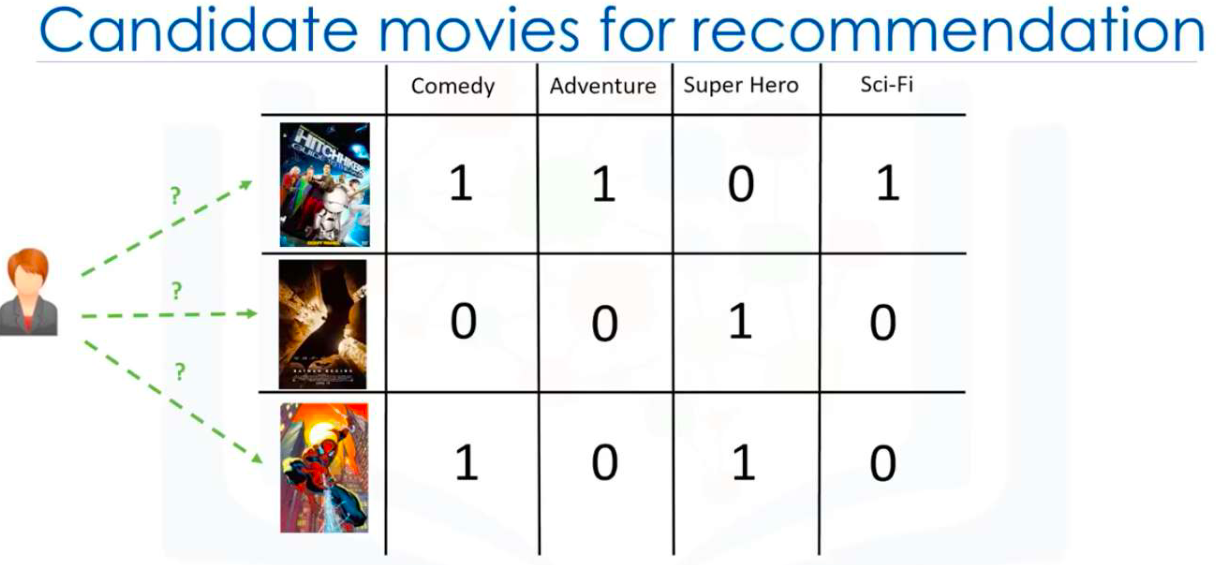

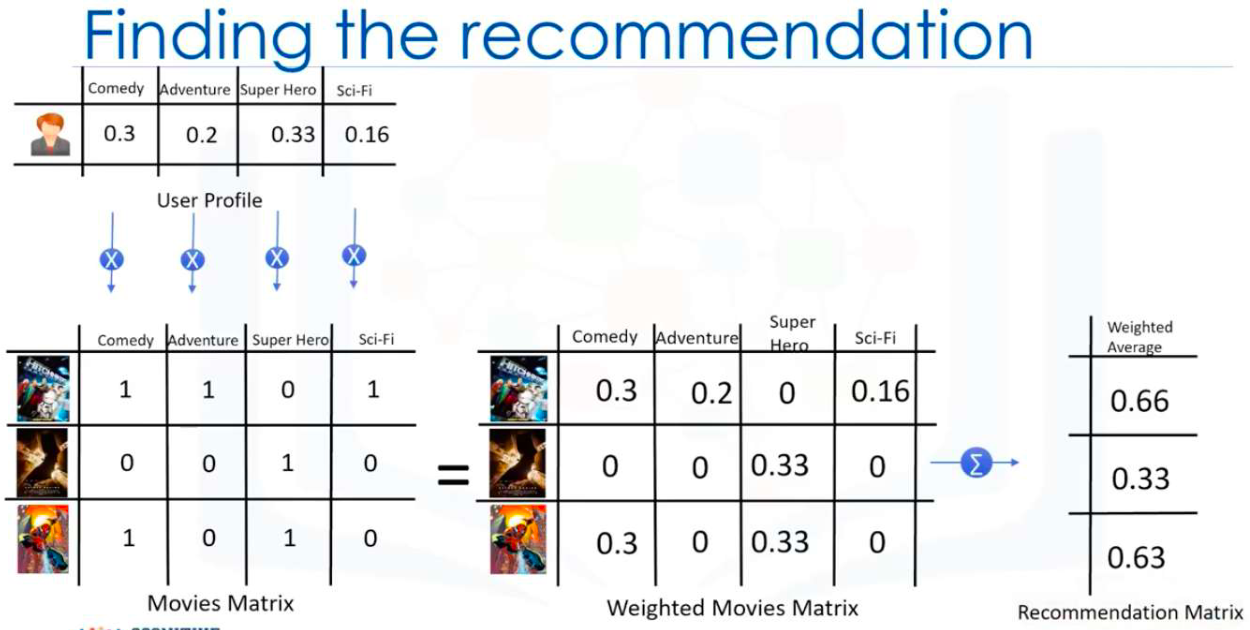

#### Create `input_genre_df` of the Active User

- start by learning the selected user's preferences.
    - get the subset of movies that the selected user has watched from the Dataframe containing genres defined with binary values.

In [35]:
# Filtering out the movies from the input
input_genre_df = users_genre_df[users_genre_df['movieId'].isin(input_movies['movieId'].tolist())]
input_genre_df

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1885,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- We'll only need the actual genre table.

In [36]:
# Resetting the index to avoid future issues
input_genre_df = input_genre_df.reset_index(drop=True)

In [37]:
# Dropping unnecessary issues due to save memory and to avoid issues
input_genre_matrix = input_genre_df.drop('movieId', axis=1) \
                           .drop('title', axis=1)   \
                           .drop('genres', axis=1)  \
                           .drop('year', axis=1)
input_genre_matrix

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Compute `UserProfile` ($\overrightarrow{\theta}$):

- start learning the selected user's preferences!

    - we're going to turn each genre into weights. 
        - multiplying the input-user's reviews (ratings) with the input-users's genre table and then summing up the resulting table by column. 
        - This operation is actually a dot product between a matrix and a vector.
            - $\overrightarrow{\theta} = A^{T} \cdot \overrightarrow{x}$

In [52]:
# Dot produt to get weights
user_profile_vec = input_genre_matrix.transpose().dot(input_movies['rating'])

In [40]:
# The user profile
# userProfile

Now, we have the weights for every of the user's preferences. This is known as the **User Profile**. Using this, we can recommend movies that satisfy the user's preferences.

Let's start by extracting the genre table from the original dataframe:

In [41]:
# Set index of `users_genre_df` as it's movieId' column
users_genre_df = users_genre_df.set_index(users_genre_df['movieId'])

In [43]:
# And drop the unnecessary information
users_genre_matrix = users_genre_df.drop('movieId', axis=1) \
                       .drop('title', axis=1)   \
                       .drop('genres', axis=1)  \
                       .drop('year', axis=1)
users_genre_matrix.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
users_genre_matrix.shape

(34208, 20)

#### Recommend new movie to the user based on his `UserProfile`

With the input's profile and the complete list of movies and their genres in hand, we're going to take the weighted average of every movie based on the input profile and recommend the top twenty movies that most satisfy it.

In [86]:
# Multiply the genres by the weights and then take the weighted average
recommendation_vec_srs = ((users_genre_matrix*user_profile_vec).sum(axis=1))/(user_profile_vec.sum())
recommendation_vec_srs.head(5)

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

In [88]:
# recommendation_vec_srs = users_genre_matrix.dot(user_profile_vec); 
# recommendation_vec_srs = recommendation_vec_srs/user_profile_vec.sum()

In [89]:
# Sort our recommendations in descending order
recommendation_vec_srs = recommendation_vec_srs.sort_values(ascending=False)
# Just a peek at the values
recommendation_vec_srs.head()

movieId
5018      0.748252
26093     0.734266
27344     0.720280
148775    0.685315
6902      0.678322
dtype: float64

In [90]:
# recommendation_vec_srs[0]

Recommend the items with the highest score

Now here's the recommendation table!

In [91]:
# The final recommendation table
recommendation_tbl_df = movies_df.loc[movies_df['movieId'].isin(recommendation_vec_srs.head(4).keys())]

In [92]:
recommendation_tbl_df

,movieId,title,year
4923,5018,Motorama,1991
8605,26093,"Wonderful World of the Brothers Grimm, The",1962
9296,27344,Revolutionary Girl Utena: Adolescence of Utena...,1999
33509,148775,Wizards of Waverly Place: The Movie,2009


### Method-2

#### Mathematical Derivation:

In [ ]:
data = np.array([[5,5,0,0], [5,'?','?',0], ['?',4,0,'?'], [0,0,5,4], [0,0,5,'?']])

In [ ]:
idx = ['Love at Last', 'Romance Forever', 'Cute Puppies of Love', 'Nonstop Car Chases', 'Swords vs Karate']
col = ['Alice', 'Bob', 'Carol', 'Dave']

In [ ]:
# Item-User Matrix
Y = pd.DataFrame(data, index=idx, columns=col); Y

In [ ]:
# Item-Genres Matrix (movies_with_genres)
X = pd.DataFrame(X_data, index=idx, columns=['Romance', 'Action']); X

In [ ]:
X_data = np.array([[0.9,0],[1.0,0.01],[0.99,0],[0.1,1.0],[0,0.9]]); X_data

### Advantages and Disadvantages of Content-Based Filtering

<font color='magenta'>Advantages:</font>

* Learns user's preferences
* Highly personalized for the user

<font color='magenta'> Disadvantages:</font>
    
* Doesn't take into account what others think of the item, so low quality item recommendations might happen
* Extracting data is not always intuitive
* Determining what characteristics of the item the user dislikes or likes is not always obvious

## Collaborative Filtering

Two Types of Colaborative Filtering:
- User Based Colaborative Filtering (Based on User's Neighbors)
- Item Based Colaborative Filtering (Based on Item's Similarity)

Challenges of Colaborative Filtering:
- Data Sparsity: Users in general rate only a limited number of movies.
- Cold Stars: Difficulties in recommendation to new usera or items.
- Scalability: Increase in number of users or items.

- The technique we're going to take a look at is called __Collaborative Filtering__, which is also known as __User-User Filtering__. As hinted by its alternate name, this technique uses other users to recommend items to the input user. 

    - <font color='red'>It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input</font>. 
        - There are several methods of finding similar users 
            - use of Machine Learning, 
            - we will be using the __Pearson Correlation Function__.

The `five-steps` process for creating a User Based recommendation system is as follows:
- Select a user with movies the user has watched
- Find the top X neighbours who have seen (ratted) most of the input user's movies if not all.
- Get the watched movie record of the user for each neighbour.
- Calculate a similarity score using some formula
- Recommend the items with the highest score


Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .

In [53]:
movies_df.head(3)

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995


Lets drop the genres column.

In [54]:
movies_df = movies_df.drop('genres', axis=1)

Here's the final movies dataframe:

In [55]:
movies_df.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


Here's the final ratings dataframe:

In [56]:
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


#### Select a user with movies the user has watched

In [57]:
input_movies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


#### Filter the users who has seen the same movies

Now with the movie ID's in our input, we can now get the subset of users that have watched and reviewed the movies in our input.

In [58]:
# Filtering out users that have watched movies that the selected user has watched and storing it
neighbors = ratings_df[ratings_df['movieId'].isin(input_movies['movieId'])]
neighbors

,userId,movieId,rating
19,4,296,4.0
441,12,1968,3.0
479,13,2,2.0
531,13,1274,5.0
681,14,296,2.0
...,...,...,...
22883679,247738,296,4.0
22884132,247751,1,4.0
22884142,247751,296,4.0
22884164,247751,1274,5.0


- We now group up the rows by user ID.

In [59]:
# Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
neighbors_grouped = neighbors.groupby(['userId'])

In [60]:
neighbors_grouped

- lets look at two of the users, e.g. one with **userID=1130** and another with **userID=4**

In [61]:
neighbors_grouped.get_group(1130)

,userId,movieId,rating
104167,1130,1,0.5
104168,1130,2,4.0
104214,1130,296,4.0
104363,1130,1274,4.5
104443,1130,1968,4.5


In [62]:
type(neighbors_grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [63]:
neighbors_grouped.get_group(4)

,userId,movieId,rating
19,4,296,4.0


In [64]:
[print(group, '\n') for (i, group) in zip(range(5), neighbors_grouped)]

(4,     userId  movieId  rating
19       4      296     4.0) 

(12,      userId  movieId  rating
441      12     1968     3.0) 

(13,      userId  movieId  rating
479      13        2     2.0
531      13     1274     5.0) 

(14,      userId  movieId  rating
681      14      296     2.0) 

(15,      userId  movieId  rating
749      15        1     4.0
776      15      296     3.0
911      15     1968     3.0) 



/var/folders/f4/qkdf_4lj59l90mh4fqh_rtvr0000gn/T/ipykernel_85901/538714467.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  [print(group, '\n') for (i, group) in zip(range(5), neighbors_grouped)]


[None, None, None, None, None]

Let's also sort these groups so the users that share the most movies in common with the input-user have higher priority. This provides a richer recommendation since we won't go through every single user.

In [65]:
# Sorting it so users with most movies in common with input user have higher priority
# userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
neighbors_grouped = sorted(neighbors_grouped,  key=lambda x: x[1].shape[0], reverse=True)

/var/folders/f4/qkdf_4lj59l90mh4fqh_rtvr0000gn/T/ipykernel_85901/28500192.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  neighbors_grouped = sorted(neighbors_grouped,  key=lambda x: x[1].shape[0], reverse=True)


Now lets look at the first user

In [66]:
neighbors_grouped[0:3]

[(75,
        userId  movieId  rating
  7507      75        1     5.0
  7508      75        2     3.5
  7540      75      296     5.0
  7633      75     1274     4.5
  7673      75     1968     5.0),
 (106,
        userId  movieId  rating
  9083     106        1     2.5
  9084     106        2     3.0
  9115     106      296     3.5
  9198     106     1274     3.0
  9238     106     1968     3.5),
 (686,
         userId  movieId  rating
  61336     686        1     4.0
  61337     686        2     3.0
  61377     686      296     4.0
  61478     686     1274     4.0
  61569     686     1968     5.0)]

#### Similarity of the input user to his neighbors

- we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.  
- we're going to find out how similar each user is to the input through the [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). It is used to measure the strength of a linear association between two variables. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below. 

**Why Pearson Correlation?**

<font color='red'>Pearson correlation is invariant to scaling</font> (i.e. multiplying all elements by a nonzero constant or adding any constant to all elements). For example, if you have two vectors X and Y,then, $$pearson(X, Y) = pearson(X, 2 * Y + 3)$$ This is a pretty important property in recommendation systems because, for example, two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

\begin{split}
    \Large r_{xy} 
    &= \frac{ \sum\limits ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum\limits ^n _{i=1}(y_i - \bar{y})^2}} \\
    &= \frac{n\sum\limits ^n _{i=1} x_i y_i - \sum\limits ^n _{i=1} x_i\sum\limits ^n _{i=1} y_i}{\sqrt{n\sum\limits ^n _{i=1} x_i^2-\left(\sum\limits ^n _{i=1} x_i\right)^2}~\sqrt{n\sum\limits ^n _{i=1} y_i^2-\left(\sum\limits ^n _{i=1} y_i\right)^2}} \\
    &= \frac{\sum\limits ^n _{i=1} x_i y_i-n\bar{x}\bar{y}}{\sqrt{\sum\limits ^n _{i=1} x_i^2-n\bar{x}^2}~\sqrt{\sum\limits ^n _{i=1} y_i^2-n\bar{y}^2}} \\
    &= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} = \Large\rho_{X,Y}
\end{split}

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a `perfect positive correlation`) and -1 forms a `perfect negative correlation`. 
In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.

We will select a subset of users to iterate through. This limit is imposed because we don't want to waste too much time going through every single user.

In [67]:
neighbors_grouped = neighbors_grouped[0:100]

Now, we calculate the Pearson Correlation between input user and subset group, and store it in a dictionary, where the key is the user Id and the value is the coefficient


In [68]:
# Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pc_dict = {}

# For every user group in our subset
for name, group in neighbors_grouped:
    
    # Let's start by sorting the input and current user group so the values aren't mismatch
    group = group.sort_values(by='movieId')
    input_movies = input_movies.sort_values(by='movieId')
    
    # Get the review scores for the movies that they both have in common
    input_movies_subset = input_movies['movieId'].isin(group['movieId'])
    input_movies_subset_ratings = input_movies[input_movies_subset].rating.values
    
    # Let's also put the current user group reviews in a list format
    group_ratings = group.rating.values
    
    r, p = scipy.stats.pearsonr(input_movies_subset_ratings, group_ratings)
    # print(temp_df, tempGroupList, r, '\n\n', sep='\n')
    
    pc_dict[name] = r
    

In [69]:
corr_df = pd.DataFrame.from_dict(pc_dict, orient='index')

In [70]:
corr_df.columns = ['similarity_index']
corr_df.head()

,similarity_index
75,0.827278
106,0.586009
686,0.832050
815,0.576557
1040,0.943456


In [71]:
corr_df['userId'] = corr_df.index

In [72]:
corr_df.reset_index(inplace=True, drop=True)
corr_df.head(3)

,similarity_index,userId
0,0.827278,75
1,0.586009,106
2,0.832050,686


#### The top k similar users to the Active User

Now let's get the top 50 users that are most similar to the input.

In [73]:
top_k_users = corr_df.sort_values(by='similarity_index', ascending=False)[0:50]
top_k_users.head(5)

,similarity_index,userId
64,0.961678,12325
55,0.961538,10707
34,0.961538,6207
67,0.960769,13053
4,0.943456,1040


#### Rating of all movies by selected users

Now, let's start recommending movies to the input user.

We're going to do this by taking the weighted average of the ratings of the movies using the Pearson Correlation as the weight. But to do this, we first need to get the movies watched by the users in our __corr_df__ from the ratings dataframe and then store their correlation in a new column called "similarityIndex". This is achieved below by merging of these two tables.

In [74]:
top_k_ratings = top_k_users.merge(ratings_df, left_on='userId', right_on='userId')

In [75]:
top_k_ratings.head()

,similarity_index,userId,movieId,rating
0,0.961678,12325,1,3.5
1,0.961678,12325,2,1.5
2,0.961678,12325,3,3.0
3,0.961678,12325,5,0.5
4,0.961678,12325,6,2.5


In [76]:
top_k_ratings.shape

(47240, 4)

Now all we need to do is simply multiply the movie rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

It shows the idea of all similar users to candidate movies for the input user:

In [77]:
# Multiplies the similarity by the user's ratings
top_k_ratings['weighted_rating'] = top_k_ratings['similarity_index']*top_k_ratings['rating']
top_k_ratings.head()

,similarity_index,userId,movieId,rating,weighted_rating
0,0.961678,12325,1,3.5,3.365874
1,0.961678,12325,2,1.5,1.442517
2,0.961678,12325,3,3.0,2.885035
3,0.961678,12325,5,0.5,0.480839
4,0.961678,12325,6,2.5,2.404196


In [78]:
top_k_ratings.groupby('movieId').sum()

,similarity_index,userId,rating,weighted_rating
movieId,,,,
1,38.376281,495942,184.0,140.800834
2,38.376281,495942,127.5,96.656745
3,10.253981,151444,35.0,27.254477
4,0.929294,12120,3.0,2.787882
5,11.723262,142707,36.0,27.151751
...,...,...,...,...
148630,0.716115,16456,3.0,2.148345
148652,0.576557,815,2.0,1.153113
149354,0.877058,2791,3.0,2.631174


In [79]:
# Applies a sum to the topUsers after grouping it up by userId
top_users_rating = top_k_ratings.groupby('movieId').sum()[['similarity_index','weighted_rating']]
top_users_rating.columns = ['sum_similarity_index','sum_weighted_rating']
top_users_rating.head()

,sum_similarity_index,sum_weighted_rating
movieId,,
1,38.376281,140.800834
2,38.376281,96.656745
3,10.253981,27.254477
4,0.929294,2.787882
5,11.723262,27.151751


In [80]:
# Creates an empty dataframe
recommendation_df = pd.DataFrame()

# Now we take the weighted average
recommendation_df['weighted average recommendation score'] \
    = top_users_rating['sum_weighted_rating']/top_users_rating['sum_similarity_index']
recommendation_df['movieId'] = top_users_rating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.668955,1
2,2.518658,2
3,2.657941,3
4,3.000000,4
5,2.316058,5


Now let's sort it and see the top 20 movies that the algorithm recommended!

In [81]:
recommendation_df = recommendation_df.sort_values(
    by='weighted average recommendation score', ascending=False
)

In [82]:
recommendation_df.head(3)

,weighted average recommendation score,movieId
movieId,,
27266,5.0,27266
3067,5.0,3067
26801,5.0,26801


In [83]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head()['movieId'].tolist())]

,movieId,title,year
1819,1902,Dream for an Insomniac,1996
2981,3067,Women on the Verge of a Nervous Breakdown (Muj...,1988
3319,3406,Captain Horatio Hornblower R.N.,1951
9064,26801,Dragon Inn (Sun lung moon hak chan),1992
9260,27266,2046,2004


### Advantages and Disadvantages of Collaborative Filtering

<font color='magenta'>Advantages:</font>

* Takes other user's ratings into consideration
* Doesn't need to study or extract information from the recommended item
* Adapts to the user's interests which might change over time

<font color='magenta'> Disadvantages:</font>

* Approximation function can be slow
* There might be a low of amount of users to approximate
* Privacy issues when trying to learn the user's preferences